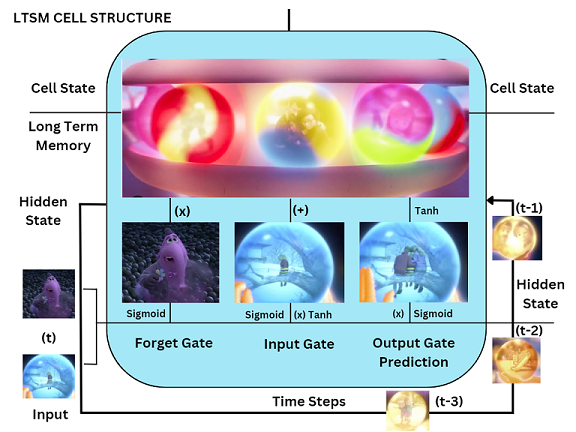

## Import Libaries

In [1]:
# !pip install matplotlib
# !pip install tensorflow
# !pip install scikit-learn
# !pip install keras
# !pip install numpy

In [ ]:
# import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.optimizers import Adam

from sklearn.metrics import mean_squared_error

## Preprocessing

Ensure the date is set as Index

In [3]:
df = pd.read_csv('./kaggle/input/IBM_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])
df.head() 

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,82.45,82.55,80.81,82.06,11715200,IBM
2006-01-04,82.20,82.50,81.33,81.95,9840600,IBM
2006-01-05,81.40,82.90,81.00,82.50,7213500,IBM
2006-01-06,83.95,85.03,83.41,84.95,8197400,IBM
2006-01-09,84.10,84.25,83.38,83.73,6858200,IBM


## Basic information Check

In [4]:
df.shape

(3020, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3020 entries, 2006-01-03 to 2017-12-29
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3019 non-null   float64
 1   High    3020 non-null   float64
 2   Low     3019 non-null   float64
 3   Close   3020 non-null   float64
 4   Volume  3020 non-null   int64  
 5   Name    3020 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 165.2+ KB


## Check for Null values

In [6]:
df.isna().sum()

Open      1
High      0
Low       1
Close     0
Volume    0
Name      0
dtype: int64

In [7]:
df.dropna(inplace=True)

## Simple representation of data

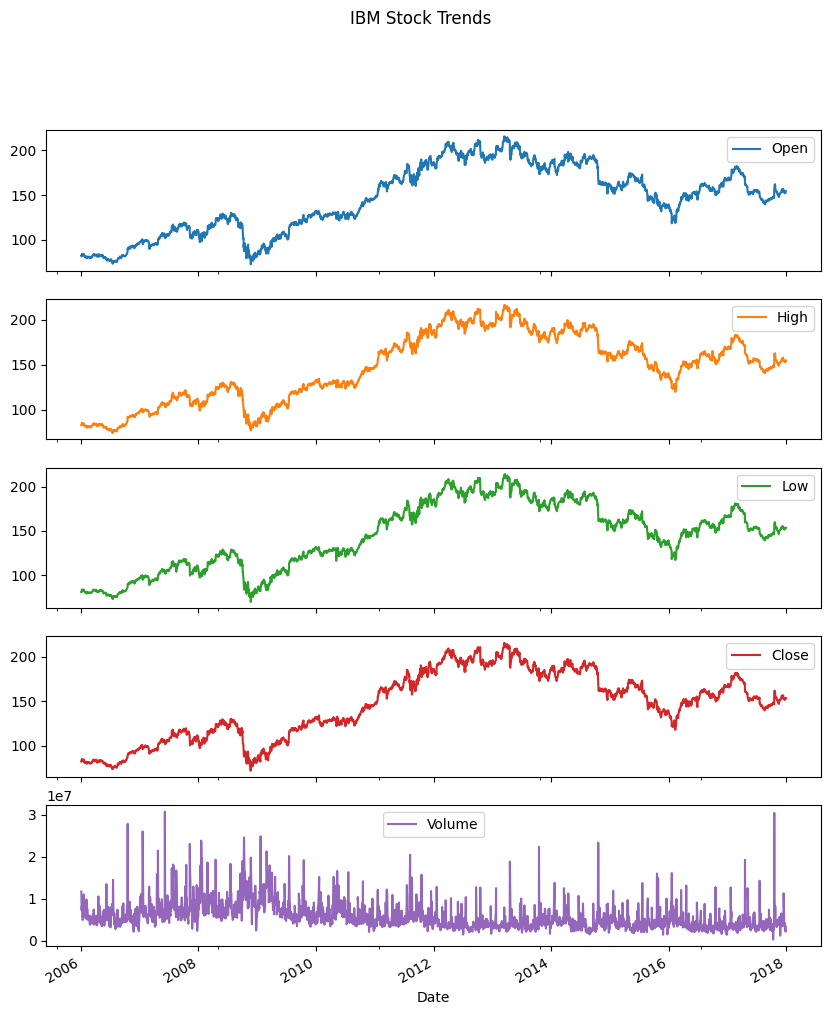

In [8]:
df.plot(subplots=True, figsize=(10,12))
plt.suptitle('IBM Stock Trends')
plt.show()

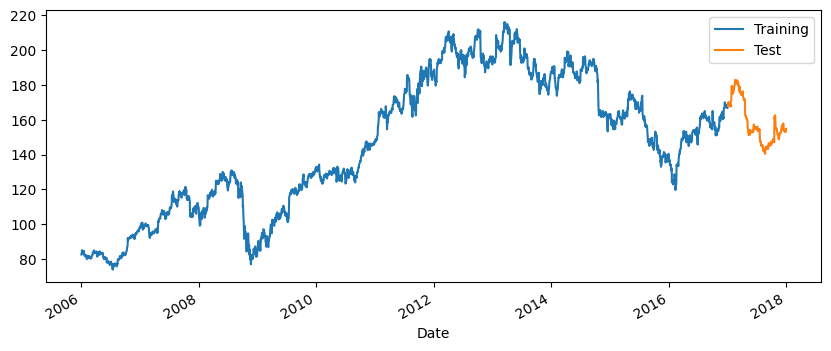

In [9]:
# All high data
df['High'][:'2016'].plot(figsize = (10,4),legend=True)
df['High']['2017':].plot(figsize = (10,4),legend=True)
plt.legend(['Training','Test'])
plt.show()

## Define Train and Test data

In [10]:
train_data = df[:'2016'].iloc[:,1:2].values
test_data = df['2017':].iloc[:,1:2].values

## Normalize Data

In [11]:
scaler = MinMaxScaler(feature_range=(0,1))
training_scaled =  scaler.fit_transform(train_data)

In [12]:
len(train_data),len(test_data),len(training_scaled)

(2769, 250, 2769)

In [13]:
TIME_STEP = 60
X_train = []
y_train = []
for i in range(TIME_STEP, len(train_data)):
    X_train.append(training_scaled[i-TIME_STEP:i,0])
    y_train.append(training_scaled[i-TIME_STEP:i,0])

## Data Formatting 

The model accepts the input format as **[samples,Timesteps,features]**

**Samples** - This is the len(data), or the total amount of data.

**Time steps** - This is equivalent to the amount of time steps you run your recurrent neural network. 

**Features** - This is the amount of features in every time step. If you are processing pictures, this is the amount of pixels. 

In [14]:
X_train , y_train = np.array(X_train) , np.array(y_train)
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1) #[samples, time steps, features].
X_train.shape, y_train.shape

((2709, 60, 1), (2709, 60))

## LSTM

In [ ]:
lstm_model = Sequential()

lstm_model.add(LSTM(units=50,return_sequences= True, input_shape= (X_train.shape[1],1)))
lstm_model.add(Dropout(0.2))

lstm_model.add(LSTM(units=50,return_sequences= True))
lstm_model.add(Dropout(0.2))

lstm_model.add(LSTM(units=50,return_sequences= True))
lstm_model.add(Dropout(0.2))

lstm_model.add(LSTM(units=50))
lstm_model.add(Dropout(0.2))

lstm_model.add(Dense(units=1))

In [16]:
lstm_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 60, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 60, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 71,051 (277.54 KB)

 Trainable params: 71,051 (277.54 KB)

 Non-trainable params: 0 (0.00 B)

## Compile and Train the model

In [17]:
lstm_model.compile(optimizer=Adam(
    learning_rate=0.00001), loss='mean_squared_error')
lstm_model.fit(X_train,y_train,epochs=10,batch_size=32)

Epoch 1/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 15s 120ms/step - loss: 0.3158
Epoch 2/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 11s 127ms/step - loss: 0.2706
Epoch 3/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 10s 119ms/step - loss: 0.2009
Epoch 4/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 9s 103ms/step - loss: 0.0885
Epoch 5/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 9s 110ms/step - loss: 0.0182
Epoch 6/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 9s 107ms/step - loss: 0.0112
Epoch 7/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 10s 112ms/step - loss: 0.0098
Epoch 8/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 9s 108ms/step - loss: 0.0097
Epoch 9/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 9s 110ms/step - loss: 0.0093
Epoch 10/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 9s 109ms/step - loss: 0.0087


In [18]:
df_test = pd.concat((df["High"][:'2016'],df["High"]['2017':]),axis=0)
inputs = df_test[len(df_test)-len(test_data) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

## Predictions

In [19]:
X_test = []
for i in range(TIME_STEP,len(test_data)+TIME_STEP):
    X_test.append(inputs[i-TIME_STEP:i,0])
    

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

y_pred = lstm_model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step


In [20]:
mse = mean_squared_error(test_data,y_pred)
rmse = math.sqrt(mse)
print('The Mean square Error:',rmse)

The Mean square Error: 7.181826171805517


## Visualisation

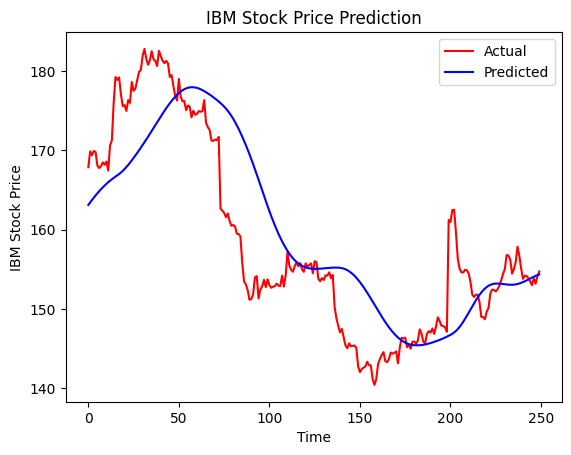

In [21]:
plt.plot(test_data, color='red',label='Actual')
plt.plot(y_pred, color='blue',label='Predicted')
plt.title('IBM Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('IBM Stock Price')
plt.legend()
plt.show()